In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import random
from imdbDataSet import *

In [70]:
class Node:
    def __init__(self, checking_feature=None, is_leaf=False, feature_value=None, category=None):
        self.checking_feature = checking_feature
        self.feature_value = feature_value
        self.is_leaf = is_leaf
        self.category = category
        self.left_child = None
        self.right_child = None
        # keep track of how many of the checking factor have a result of yes / no
        self.trues = 0
        self.falses = 0
        self.total = 0
        
    def addTrue(self):
        self.trues += 1
        self.total += 1
        
    def addFalse(self):
        self.falses += 1
        self.total += 1
    
class Stump:
    def __init__(self, root=None, left_child=None, right_child=None):
        self.root = root
        self.left_child = left_child
        self.right_child = right_child
        self.checking_feature = root.checking_feature
        

In [71]:
def createDF(x, y, sample_w, features):
    # make dataframe
    df = pd.DataFrame(x, columns=features)
    # add y column
    features.append("Positive")
    df["Positive"] = y
    # add first sample weights to dataframe
    features.append("Sample Weight")
    df["Sample weights"] = sample_w
    
    return df, x, y

# initialize list of lists
imdb = IMDB()
imdb.getTrainingData(1, 2, 3, 20, 50, 200)

# get feature vector
features = imdb.getFeatureVector(20, 50)

# get values of each feature for n movie reviews
n = 10
x_train = np.zeros((n, len(features)))
y_train = list()
# for the first n reviews
for i in range(n):
    x_i = imdb.getXtrain(i)
    y_train.append(imdb.getYtrain(i))
    # for word index in x_train
    for wi in x_i:
        if wi == 2:
            continue
        elif (wi in features):
            j = features.index(wi)
            x_train[i][j] = 1

# Create the pandas DataFrame
sample_w = [1/n for i in range(n)]
df = createDF(x_train, y_train, sample_w, features)[0]

stumps=[]
igs=[]

display(df)

,21,22,23,24,25,26,27,28,29,30,...,63,64,65,66,67,68,69,70,Positive,Sample weights
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.1
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
7,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
9,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1


In [72]:
# create stumps
def makeStumps(x, y, features):
    stumps = []

    for j in range(len(features) - 2):
        root, left, right = Node(features[j]), Node(features[j], True), Node(features[j], True)
        root.left_child = left
        root.right_child = right

        for i in range(len(x)):
            if (x[i][j] == 0):
                if (y[i] == 0):
                    left.addTrue()
                else:
                    left.addFalse()
            else:
                if (y[i] == 1):
                    right.addTrue()
                else:
                    right.addFalse()
        s = Stump(root, left, right)
        stumps.append(s)

    return stumps

# check stumps made
stumps = makeStumps(x_train, y_train, features)
for stump in stumps:
    print("(" + str(stump.root.checking_feature) + ", " + imdb.getInvertedWordIndex(stump.root.checking_feature) + ")\n---------------------")
    print("Negative", "\n Y:", stump.left_child.trues, "\tN:", stump.left_child.falses, "\tT:", stump.left_child.total)
    print("Positive", "\n Y:", stump.right_child.trues, "\tN:", stump.right_child.falses, "\tT:", stump.right_child.total)
    print()

(21, but)
---------------------
Negative 
 Y: 4 	N: 1 	T: 5
Positive 
 Y: 0 	N: 5 	T: 5

(22, film)
---------------------
Negative 
 Y: 4 	N: 0 	T: 4
Positive 
 Y: 1 	N: 5 	T: 6

(23, on)
---------------------
Negative 
 Y: 5 	N: 0 	T: 5
Positive 
 Y: 1 	N: 4 	T: 5

(24, not)
---------------------
Negative 
 Y: 6 	N: 1 	T: 7
Positive 
 Y: 0 	N: 3 	T: 3

(25, you)
---------------------
Negative 
 Y: 5 	N: 1 	T: 6
Positive 
 Y: 0 	N: 4 	T: 4

(26, are)
---------------------
Negative 
 Y: 6 	N: 0 	T: 6
Positive 
 Y: 1 	N: 3 	T: 4

(27, his)
---------------------
Negative 
 Y: 9 	N: 1 	T: 10
Positive 
 Y: 0 	N: 0 	T: 0

(28, have)
---------------------
Negative 
 Y: 2 	N: 1 	T: 3
Positive 
 Y: 0 	N: 7 	T: 7

(29, he)
---------------------
Negative 
 Y: 8 	N: 1 	T: 9
Positive 
 Y: 0 	N: 1 	T: 1

(30, be)
---------------------
Negative 
 Y: 6 	N: 1 	T: 7
Positive 
 Y: 0 	N: 3 	T: 3

(31, one)
---------------------
Negative 
 Y: 7 	N: 1 	T: 8
Positive 
 Y: 0 	N: 2 	T: 2

(32, all)
-----------

In [73]:
def informationGain(category_vector, feature_values):
    category_set = set(category_vector)
    
    # calculate entropy
    HC = 0
    for c in category_set:
        PC = category_vector.count(c) / len(category_vector) # P(C=c)
        HC += - PC * np.log2(PC)
    #print("Entropy:", HC)
    
    # calculate IG(C, X)
    feature_set = set(feature_values)
    HC_feature = 0
    for value in feature_set:
        # p_feature --> P(X=x)
        P_feature = feature_values.count(value) / len(feature_values) # count occurences of value
        indices = [i for i in range(len(feature_values)) if feature_values[i] == value] # rows that have X=x
        category_of_feature = [category_vector[i] for i in indices] # category of rows listed in indices above
        for c in category_set:
            # PC_feature --> P(C=c|X=x)
            PC_feature = category_of_feature.count(c) / len(category_of_feature) # given X=x, count C
            if PC_feature != 0:
                # - P(X=x) * P(C=c|X=x) * log2(P(C=c|X=x))
                temp_H = - P_feature * PC_feature * np.log2(PC_feature)
                # sum for all values of C (class) and X (values of specific feature)
                HC_feature += temp_H
    IG = HC - HC_feature
    return IG

# check information gain
for s in range(len(stumps)):
    print("(" + str(stumps[s].root.checking_feature) + ", " + imdb.getInvertedWordIndex(stumps[s].root.checking_feature) + ") stump\n----------------------")
    feature_values = [x_train[i][s] for i in range(len(x_train))]
    category_vector = list(y_train)
    ig = informationGain(category_vector, feature_values)
    igs.append(ig)
    print("IG:", ig, "\n")


(21, but) stump
----------------------
IG: 0.10803154614560007 

(22, film) stump
----------------------
IG: 0.07898214060026876 

(23, on) stump
----------------------
IG: 0.10803154614560007 

(24, not) stump
----------------------
IG: 0.054824648581652036 

(25, you) stump
----------------------
IG: 0.07898214060026876 

(26, are) stump
----------------------
IG: 0.14448434380562802 

(27, his) stump
----------------------
IG: 0.0 

(28, have) stump
----------------------
IG: 0.19350684337293433 

(29, he) stump
----------------------
IG: 0.016063092291200065 

(30, be) stump
----------------------
IG: 0.054824648581652036 

(31, one) stump
----------------------
IG: 0.034144039029604056 

(32, all) stump
----------------------
IG: 0.10803154614560007 

(33, at) stump
----------------------
IG: 0.10803154614560007 

(34, by) stump
----------------------
IG: 0.016063092291200065 

(35, an) stump
----------------------
IG: 0.07898214060026876 

(36, they) stump
----------------------


In [74]:
# find stump with the most IG
fstump = stumps[np.where(igs == max(igs))[0][0]] # find the index of the max IG and then get the stump from the array of stumps
                                                # by that index
print("Choosing stump hosting feature: (" + str(fstump.checking_feature) + ", " + imdb.getInvertedWordIndex(fstump.checking_feature) + ")")

Choosing stump hosting feature: (37, who)


Total Error of 37 stump: 0.1
Stump's Importance: 1.0986122886681098


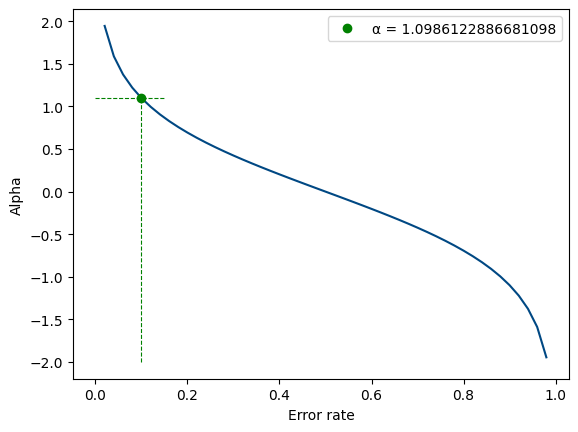

In [75]:
def amountOfSay(totalError):
    a = 0.5 * np.log((1 - totalError) / totalError)
    return a

def plotAmountOfSay(totalError, a):
    # plot the performance curve
    plt.xlabel("Error rate")
    plt.ylabel("Alpha")
    # evenly sampled error rate at 0.02 intervals
    err_rate = np.arange(0.02, 1., 0.02)
    plt.plot(err_rate, 0.5*np.log((1 - err_rate)/err_rate), '#004883')
    # plot our α
    plt.plot([totalError], [a], 'go', label="α = " + str(a))
    x_0_dotted = np.arange(-2, a+0.05, 0.05)
    y_0_dotted = np.arange(0., totalError+0.05, 0.05) if a < 2 else np.arange(0., totalError, 0.05)
    plt.plot(np.zeros(len(x_0_dotted)) + totalError, x_0_dotted, 'g--', linewidth=0.8)
    plt.plot(y_0_dotted, np.zeros(len(y_0_dotted)) + a, 'g--', linewidth=0.8)
    
    plt.legend()
    plt.show()

# calculate totalError
terror = (fstump.left_child.falses + fstump.right_child.falses) / (fstump.left_child.total + fstump.right_child.total)
# check if total error is either 0 or 1, if it is add / subtract sys.epsilon so the amount of say equation doesn't freak out
if (terror == 0):
    terror += sys.float_info.epsilon
elif (terror == 1):
    terror -= sys.float_info.epsilon
print("Total Error of " + str(fstump.checking_feature) + " stump:", terror)
# find performance of stump (amount of say: α)
a = amountOfSay(terror)
print("Stump's Importance:", a)
# plot the amount of say
plotAmountOfSay(terror, a)

In [76]:
def newSampleWeights(x, y, sample_w, features, stump, a):
    new_sample_weights = []
    # get index of checking feature and category
    feature_j = features.index(stump.checking_feature)
    category_j = features.index(features[len(features) - 2])

    # get each row and check if it is wrongly classified based on the feature
    for i in range(len(x)):
        n_sample = 0
        # left child
        if (x[i][j] == 0):
            # correctly classified
            if (y[i] == 0):
                n_sample = sample_w[i] * np.exp(-a)
            # wrongly classified
            else:
                n_sample = sample_w[i] * np.exp(a)
        # right child
        else:
            # correctly classified
            if (y[i] == 1):
                n_sample = sample_w[i] * np.exp(-a)
            # wrongly classified
            else:
                n_sample = sample_w[i] * np.exp(a)
        new_sample_weights.append(n_sample)
        
    return new_sample_weights

def normalizeSampleWeights(sample_weights):
    sample_sum = sum(sample_weights)
    for i in range(len(sample_weights)):
        sample_weights[i] = sample_weights[i] / sample_sum

def makeBuckets(sample_weight):
    buckets = []
    buckets.append(sample_weight[0])
    for i in range(1, len(sample_weight), 1):
        buckets.append(buckets[i-1] + sample_weight[i])
    return buckets
        
# make new sample weights based on the right/wrong classifications
new_sample_weights = newSampleWeights(x_train, y_train, sample_w, features, fstump, a)
print("New Sample Weights:", new_sample_weights)
# normalize new sample weights
normalizeSampleWeights(new_sample_weights)
print("New Normalized Sample Weights:", new_sample_weights)
# make buckets
buckets = makeBuckets(new_sample_weights)
print("Buckets:", buckets)

# make deep copy of the dataframe
temp_df = df.copy(True)

temp_df["New sample weights"] = new_sample_weights
temp_df["Buckets"] = buckets
display(temp_df)

New Sample Weights: [0.03333333333333333, 0.30000000000000004, 0.03333333333333333, 0.30000000000000004, 0.03333333333333333, 0.30000000000000004, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.30000000000000004]
New Normalized Sample Weights: [0.023809523809523805, 0.21428571428571427, 0.023809523809523805, 0.21428571428571427, 0.023809523809523805, 0.21428571428571427, 0.023809523809523805, 0.023809523809523805, 0.023809523809523805, 0.21428571428571427]
Buckets: [0.023809523809523805, 0.23809523809523808, 0.26190476190476186, 0.47619047619047616, 0.49999999999999994, 0.7142857142857142, 0.738095238095238, 0.7619047619047619, 0.7857142857142857, 1.0]


,21,22,23,24,25,26,27,28,29,30,...,65,66,67,68,69,70,Positive,Sample weights,New sample weights,Buckets
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.023810,0.023810
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.214286,0.238095
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.023810,0.261905
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.214286,0.476190
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.1,0.023810,0.500000
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.214286,0.714286
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.023810,0.738095
7,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.023810,0.761905
8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.023810,0.785714
9,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1,0.214286,1.000000


In [83]:
rigged_rand = [0.38, 0.26, 0.98, 0.40, 0.55, 0.1, 0.22, 0.35, 0.68, 0.15] # Rigged random numbers (debugging)

def makeNewDF(template, x, y, features, rows):
    new_x = []
    new_y = []
    new_sample_w = [1/rows for i in range(rows)]
    features = features[:len(features)-2:1]
    # for each row in the new data set
    for i in range(rows):
        rand_num = random.uniform(0, 1)
        #print(rand_num)
        # choose a row from the old data set
        for j in range(rows):
            if (rand_num < template["Buckets"][j]):
                new_x.append(x[j])
                new_y.append(y[j])
                break
                
    return createDF(new_x, new_y, new_sample_w, features)
            
# make new data frame with the size of the original
# we each row we will generate a random number and having the "Buckets" columns as a distribution, wherever the
# radnom number falls in the "Buckets" column we will take that row and add it to the new data frame
result = makeNewDF(temp_df, x_train, y_train, features, len(y_train))
new_df = result[0]
new_x_train, new_y_train = result[1], result[2]
display(new_df)
    

,21,22,23,24,25,26,27,28,29,30,...,63,64,65,66,67,68,69,70,Positive,Sample weights
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
7,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
8,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1
9,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.1


In [96]:
class Adaboost:
    def __init__(self, iterations=5, _print=True):
        self.iterations = iterations
        self._print = _print # print process (yes / no)
        self.x_train = None
        self.y_train = None
        self.sample_w = None
        self.features = None
        self.df = None
        self.dfs = []
        self.chosen_stump = None
        self.chosen_stumps = []
        self.chosen_stump_a = None
        self.chosen_stumps_a = []
        
    def fit(self, x, y, features):
        self.x_train = x
        self.y_train = y
        n = len(y_train)
        self.sample_w = [1/n for i in range(n)]
        self.features = features
        self.df = createDF(self.x_train, self.y_train, self.sample_w, self.features)[0]
        for i in range(self.iterations):
            if (self._print):
                display(self.df)
            self.train()
            if (self._print):
                print(10*"----------")
        
    def train(self):
        # make stumps and get IG of each stump
        _stumps = makeStumps(self.x_train, self.y_train, self.features)
        _igs = []
        for s in range(len(_stumps)):
            if (self._print):
                print("(" + str(_stumps[s].root.checking_feature) + ", " + imdb.getInvertedWordIndex(_stumps[s].root.checking_feature) + ")\n---------------------")
                print("Negative", "\n Y:", _stumps[s].left_child.trues, "\tN:", _stumps[s].left_child.falses, "\tT:", _stumps[s].left_child.total)
                print("Positive", "\n Y:", _stumps[s].right_child.trues, "\tN:", _stumps[s].right_child.falses, "\tT:", _stumps[s].right_child.total)
                print()
                
                print("(" + str(_stumps[s].root.checking_feature) + ", " + imdb.getInvertedWordIndex(_stumps[s].root.checking_feature) + ") stump\n----------------------")
            feature_values = [self.x_train[i][s] for i in range(len(self.x_train))]
            category_vector = list(self.y_train)
            ig = informationGain(category_vector, feature_values)
            _igs.append(ig)
            if (self._print):
                print("IG:", ig, "\n")
        
        # find stump with the most IG
        self.chosen_stump = _stumps[np.where(_igs == max(_igs))[0][0]] # find the index of the max IG and then get the stump from the array of stumps
                                                                    # by that index
        if (self._print):
            print("Choosing stump hosting feature: (" + str(self.chosen_stump.checking_feature) + ", " + imdb.getInvertedWordIndex(self.chosen_stump.checking_feature) + ")")
        self.chosen_stumps.append(self.chosen_stump)
        
        # calculate totalError
        _terror = (self.chosen_stump.left_child.falses + self.chosen_stump.right_child.falses) / (self.chosen_stump.left_child.total + self.chosen_stump.right_child.total)
        # check if total error is either 0 or 1, if it is add / subtract sys.epsilon so the amount of say equation doesn't freak out
        if (_terror == 0):
            _terror += sys.float_info.epsilon
        elif (_terror == 1):
            _terror -= sys.float_info.epsilon

        # find performance of stump (amount of say: α)
        self.chosen_stump_a = amountOfSay(_terror)
        self.chosen_stumps_a.append(self.chosen_stump_a)

        if (self._print):
            print("Total Error of " + str(self.chosen_stump.checking_feature) + " stump:", _terror)
            print("Stump's Importance:", self.chosen_stump_a)
        
        # make new sample weights based on the right/wrong classifications
        _new_sample_weights = newSampleWeights(self.x_train, self.y_train, self.sample_w, self.features, self.chosen_stump, self.chosen_stump_a)
        if (self._print):
            print("New Sample Weights:", _new_sample_weights)
        # normalize new sample weights
        normalizeSampleWeights(_new_sample_weights)
        # make buckets
        _buckets = makeBuckets(_new_sample_weights)
        if (self._print):
            print("New Normalized Sample Weights:", _new_sample_weights)
            print("Buckets:", buckets)
        
        self.df["New sample weights"] = _new_sample_weights
        self.df["Buckets"] = _buckets
        if (self._print):
            display(self.df)
        
        # make new data frame with the size of the original
        # we each row we will generate a random number and having the "Buckets" columns as a distribution, wherever the
        # radnom number falls in the "Buckets" column we will take that row and add it to the new data frame
        self.dfs.append(self.df)
        n = len(self.df)
        new_data_frame = makeNewDF(self.df, self.x_train, self.y_train, self.features, n)
        self.df, self.x_train, self.y_train = new_data_frame[0], new_data_frame[1], new_data_frame[2]
        self.sample_w = [1/n for i in range(n)]

    def predict(self, X, cap, features):
        if (features != self.features):
            print("Features of given don't match")
            return
        
        predictions = list()
        tempX = X[:cap]
        
        # for every x in X
        for x in tempX:
            positive_votes = list()
            negative_votes = list()
            # for every stump in the stump forest
            for i in range(len(self.chosen_stumps)):
                # stump
                stump = self.chosen_stumps[i]
                # what are we checking in this stump
                checking_word = stump.checking_feature
                # check if the word exists in the given x
                if (checking_word in x):
                    # then go to right_child and check how many correct classifications we have in this case
                    # correctly classified
                    if (stump.right_child.trues >= stump.right_child.falses):
                        positive_votes.append(self.chosen_stumps_a[i])
                    # wrongly classified
                    else:
                        negative_votes.append(self.chosen_stumps_a[i])
                # if it doesn't exist in x
                else:
                    # then go to left child and check how many correct classifications we have in this case
                    # wrongly classified
                    if (stump.left_child.falses >= stump.left_child.trues):
                        positive_votes.append(self.chosen_stumps_a[i])
                    # correctly classified
                    else:
                        negative_votes.append(self.chosen_stumps_a[i])
            # check which has the biggest sum
            print(sum(positive_votes), "\n", sum(negative_votes))
            # positive
            if (sum(positive_votes) >= sum(negative_votes)):
                predictions.append(1)
            # negative
            else:
                predictions.append(0)

        return predictions


    

In [97]:
# initialize list of lists
imdb = IMDB()
real = imdb.getTrainingData(1, 2, 3, 0, 60000, 200)
# print the reviews of 10 movies
for i in range(10):
    print("["+str(i)+"]:", imdb.getDecodedSequence(real[1][0], i))
res = imdb.getTrainingData(1, 2, 3, 500, 10000, 200)
train, test = res[0], res[1]
print("Actual reviews:", test[1][:10])

# get feature vector
features = imdb.getFeatureVector(500, 10000)

# get values of each feature for n movie reviews
n = 100
x_train = np.zeros((n, len(features)))
y_train = list()
# for the first n reviews
for i in range(n):
    x_i = imdb.getXtrain(i)
    y_train.append(imdb.getYtrain(i))
    # for word index in x_train
    for wi in x_i:
        if wi == 2:
            continue
        elif (wi in features):
            j = features.index(wi)
            x_train[i][j] = 1

adaboost = Adaboost(iterations=10, _print=False)
adaboost.fit(x_train, y_train, features)

# test
predictions = adaboost.predict(test[0], 10, features)
print(predictions)

[0]: [START] please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss
[1]: [START] i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise a